In [1]:
#LIBRARIES
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# INTRODUCTION


Linear regression is a statistical method used to analyze and model the relationship between two or more variables. In the context of civil engineering, linear regression can be used to predict the compressive strength of paving blocks made of sand and plastic based on various input variables.

In this case, the input variables include the identification number, type of mould (in this case, HEXAGON), area of the mould, ingredients in paving sand (in kg), percentage of plastic in the paving block, load, weight, and compressive strength. The output variable is the compressive strength of the paving block.

By performing linear regression analysis on this data, we can create a mathematical model that predicts the compressive strength of a HEXAGON-shaped paving block based on its input variables. This model can be used to optimize the mix design of the paving block by adjusting the amount of sand, plastic, load, and weight used, with the goal of achieving the desired compressive strength.

Overall, linear regression is a powerful tool in civil engineering that can help optimize the design and construction of various structures, including paving blocks.

In [53]:
df = pd.read_csv('hexagon data.csv')
df

,sr_no,Identification_no,Type_ of_mould,area _of _mould,ingridients_in_paving_sand_In_KG,ingridients_in_paving_plastic_%,Load,Weight,Compressive_Strength
0,1,B1,hexagon,34359.55,1.535,40,600,2.565,17.462
1,2,B2,hexagon,34359.55,2.300,30,999,3.375,29.070
2,3,B3,hexagon,34359.55,2.300,55,718,2.910,14.930
3,4,B4,hexagon,34359.55,2.300,25,513,3.325,20.890
4,5,B5,hexagon,34359.55,1.280,48,579,2.470,16.862
5,6,B6,hexagon,34359.55,1.950,22,621,2.510,18.062
6,7,B7,hexagon,34359.55,2.260,28,930,3.140,27.050
7,8,B8,hexagon,34359.55,2.450,32,1069,3.610,31.090
8,9,B9,hexagon,34359.55,1.430,41,603,2.440,17.532
9,10,B10,hexagon,34359.55,2.480,29,834,3.500,24.248


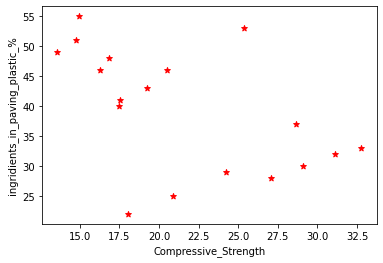

In [60]:
%matplotlib inline
plt.xlabel('Compressive_Strength')
plt.ylabel('ingridients_in_paving_plastic_%')
plt.scatter(df.Compressive_Strength, df.ingridients_in_paving_plastic_, color='red', marker='*')


In [55]:
print(df.columns)

Index(['sr_no', 'Identification_no', 'Type_ of_mould ', 'area _of _mould',
       'ingridients_in_paving_sand_In_KG', 'ingridients_in_paving_plastic_%',
       'Load', 'Weight ', 'Compressive_Strength'],
      dtype='object')


In [56]:

# update the column name 'B' to 'C'
df = df.rename(columns={'ingridients_in_paving_plastic_%': 'ingridients_in_paving_plastic_'})

# display the updated column names
print(df.columns)


Index(['sr_no', 'Identification_no', 'Type_ of_mould ', 'area _of _mould',
       'ingridients_in_paving_sand_In_KG', 'ingridients_in_paving_plastic_',
       'Load', 'Weight ', 'Compressive_Strength'],
      dtype='object')


In [57]:
df

,sr_no,Identification_no,Type_ of_mould,area _of _mould,ingridients_in_paving_sand_In_KG,ingridients_in_paving_plastic_,Load,Weight,Compressive_Strength
0,1,B1,hexagon,34359.55,1.535,40,600,2.565,17.462
1,2,B2,hexagon,34359.55,2.300,30,999,3.375,29.070
2,3,B3,hexagon,34359.55,2.300,55,718,2.910,14.930
3,4,B4,hexagon,34359.55,2.300,25,513,3.325,20.890
4,5,B5,hexagon,34359.55,1.280,48,579,2.470,16.862
5,6,B6,hexagon,34359.55,1.950,22,621,2.510,18.062
6,7,B7,hexagon,34359.55,2.260,28,930,3.140,27.050
7,8,B8,hexagon,34359.55,2.450,32,1069,3.610,31.090
8,9,B9,hexagon,34359.55,1.430,41,603,2.440,17.532
9,10,B10,hexagon,34359.55,2.480,29,834,3.500,24.248


In [58]:
new_df = df[[ 'ingridients_in_paving_plastic_', 'Compressive_Strength']]

In [59]:
new_df

,ingridients_in_paving_plastic_,Compressive_Strength
0,40,17.462
1,30,29.070
2,55,14.930
3,25,20.890
4,48,16.862
5,22,18.062
6,28,27.050
7,32,31.090
8,41,17.532
9,29,24.248


In [64]:
n_df = new_df.drop('ingridients_in_paving_plastic_',axis='columns')
n_df

,Compressive_Strength
0,17.462
1,29.070
2,14.930
3,20.890
4,16.862
5,18.062
6,27.050
7,31.090
8,17.532
9,24.248


In [65]:
ingridients_in_paving_plastic_ = df.ingridients_in_paving_plastic_
ingridients_in_paving_plastic_


0     40
1     30
2     55
3     25
4     48
5     22
6     28
7     32
8     41
9     29
10    49
11    46
12    53
13    33
14    43
15    51
16    37
17    46
Name: ingridients_in_paving_plastic_, dtype: int64

In [66]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(n_df,ingridients_in_paving_plastic_)

LinearRegression()

In [67]:
Compressive_Strength=reg.predict([[20]])
Compressive_Strength

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.72198617])

In [68]:
reg.coef_

array([-0.88211996])

In [69]:
reg.intercept_

58.36438527303504

In [70]:
50*-1.26091066+63.55929799792155

0.5137649979215482

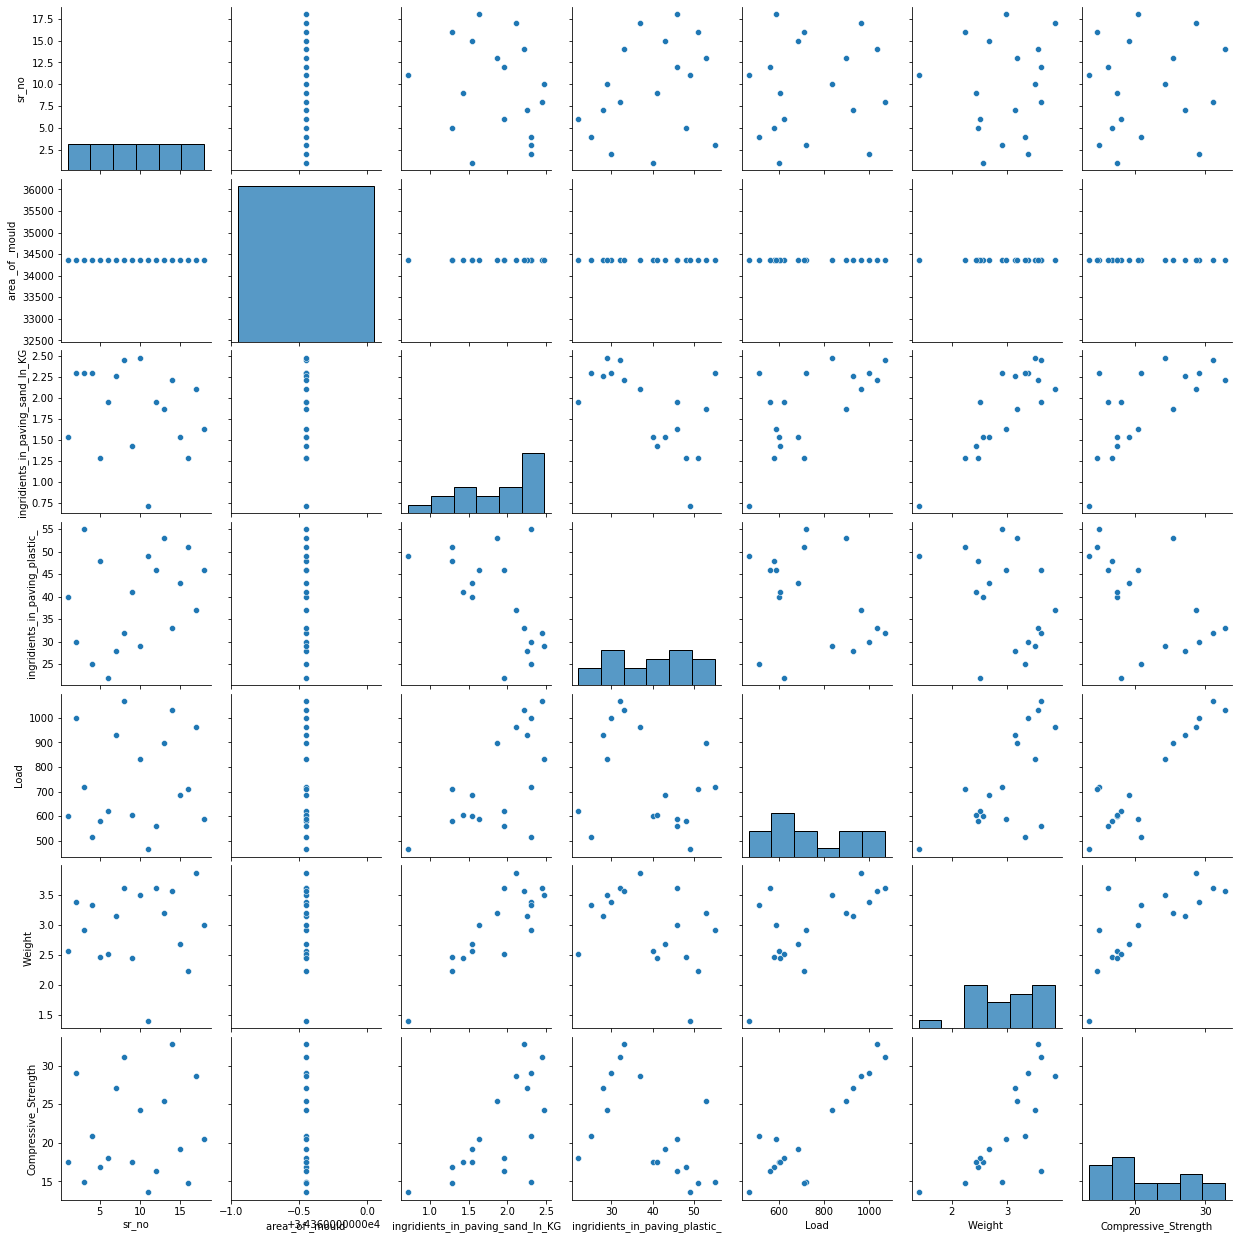

In [71]:
sns.pairplot(data = df) 